In [ ]:
##Part 2

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#from keras.models import attention
#from keras.layers.Attention import attention 
#from attention import attention_3d_block
#from tensorflow.keras.models import Model
#from tensorflow.keras.models import Model
#from tensorflow.keras.models import Model
#from tensorflow.python.keras.layers import Input
from keras.layers import Input
#from tensorflow.python.keras.layers import Input

In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
#folders = glob('../input/covid19-data/Datasets/Train')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset1/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 )

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset1/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            )

Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
   validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 1295s 13s/step - loss: 0.4056 - accuracy: 0.8425 - val_loss: 0.2204 - val_accuracy: 0.9088
Epoch 2/5
100/100 [==============================] - 8s 77ms/step - loss: 0.0819 - accuracy: 0.9791 - val_loss: 0.1832 - val_accuracy: 0.9353
Epoch 3/5
100/100 [==============================] - 8s 78ms/step - loss: 0.0460 - accuracy: 0.9915 - val_loss: 0.1763 - val_accuracy: 0.9324
Epoch 4/5
100/100 [==============================] - 8s 77ms/step - loss: 0.0321 - accuracy: 0.9952 - val_loss: 0.1761 - val_accuracy: 0.9382
Epoch 5/5
100/100 [==============================] - 8s 78ms/step - loss: 0.0230 - accuracy: 0.9975 - val_loss: 0.1821 - val_accuracy: 0.9353


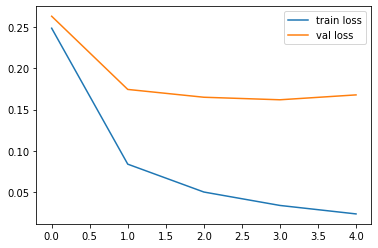

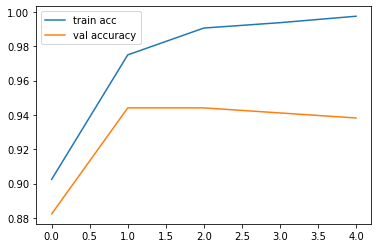

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')